In [3]:
from datetime import datetime
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

In [4]:
# Eğitim verilerinin yolu
train_data_path = "../Data/train"

# Verileri yükleme ve ön işleme
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # %20 validation için
)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(150, 150),  # Resimleri 150x150 olarak ayarlıyoruz
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1603 images belonging to 5 classes.
Found 398 images belonging to 5 classes.


In [5]:
# Define the CNN model
def create_model():
    model = tf.keras.models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))  # Assuming 5 categories
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()

C:\Users\furka\.conda\envs\ANN_Final\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [7]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30


C:\Users\furka\.conda\envs\ANN_Final\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 394ms/step - accuracy: 0.2922 - loss: 1.4873 - val_accuracy: 0.3719 - val_loss: 1.4252
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 259ms/step - accuracy: 0.3606 - loss: 1.4326 - val_accuracy: 0.3693 - val_loss: 1.3386
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 261ms/step - accuracy: 0.5082 - loss: 1.1498 - val_accuracy: 0.5377 - val_loss: 1.0685
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 262ms/step - accuracy: 0.6078 - loss: 0.7943 - val_accuracy: 0.5879 - val_loss: 0.9020
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 259ms/step - accuracy: 0.6459 - loss: 0.7057 - val_accuracy: 0.6508 - val_loss: 0.8388
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.6355 - loss: 0.6807 - val_accuracy: 0.6080 - val_loss: 0.9935
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 259ms/step - accuracy: 0.6677 - loss: 0.6075 - val_accuracy: 0.6080 - val_loss: 1.2510
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.6821 - loss: 0.5565 - val_accuracy: 0.600

In [8]:
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = f"model_{current_time}.h5"

# Modeli belirli bir dizine kaydetme
output_dir = "../Output/Model/"

os.makedirs(output_dir, exist_ok=True)
model_path = os.path.join(output_dir, model_name)
model.save(model_path)

print(f"Model saved to: {model_path}")

Model saved to: ../Output/Model/model_20240811_133158.h5


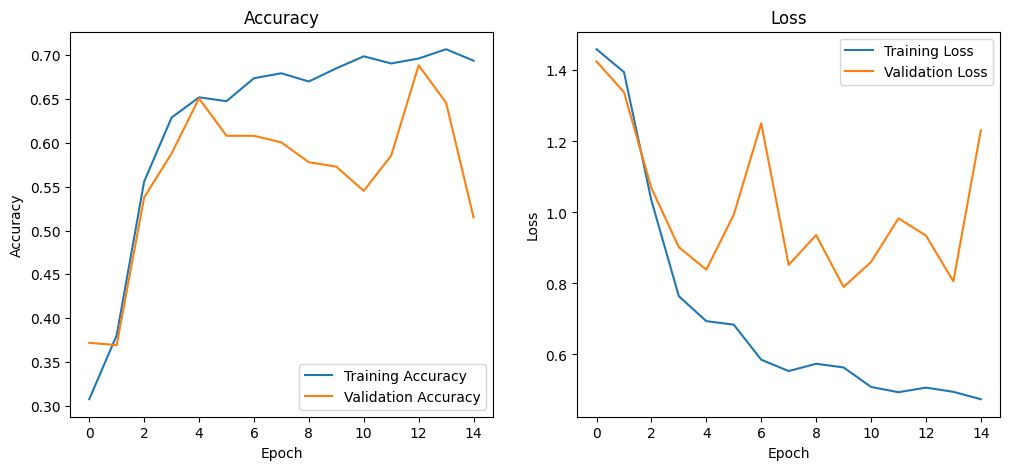

In [9]:
# Plot training & validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [10]:
# Evaluate the model on the test set
test_data_path = "/Data/CNN/train"
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate confusion matrix and accuracy
conf_matrix = confusion_matrix(y_true, y_pred_classes)
acc_score = accuracy_score(y_true, y_pred_classes)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy Score: {acc_score:.4f}')

Found 2001 images belonging to 5 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6769 - loss: 0.5569
Test Accuracy: 0.6797
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step
Confusion Matrix:
[[216  78  58 219  56]
 [178  75  74 230  82]
 [ 52  25  11  51  23]
 [139  44  60 169  44]
 [ 41  11  12  43  10]]
Accuracy Score: 0.2404


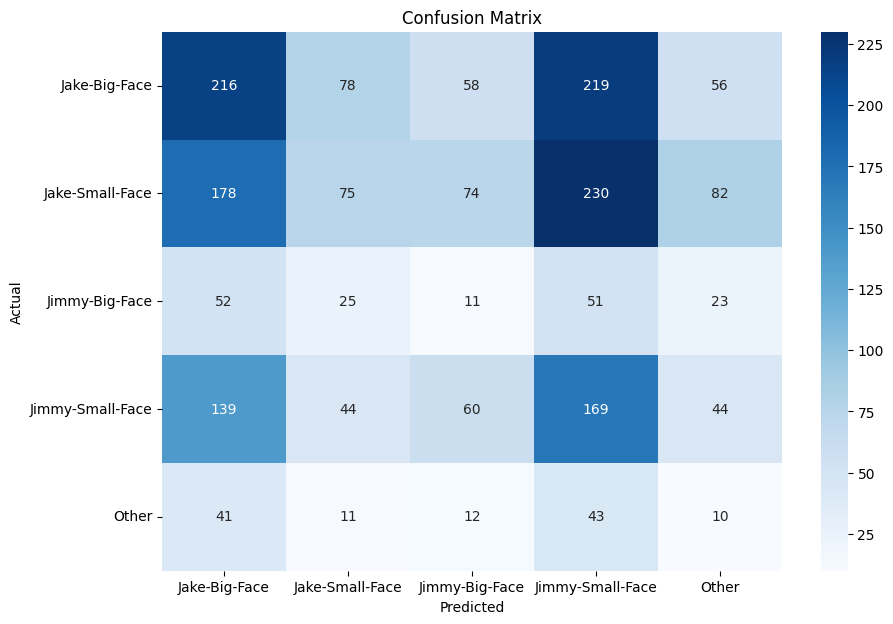

In [11]:
# Plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

class_names = test_generator.class_indices.keys()
plot_confusion_matrix(conf_matrix, class_names)

# Video İşleme

In [12]:
import cv2
import numpy as np
import tensorflow as tf


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,365,521 (39.54 MB)

 Trainable params: 3,455,173 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,910,348 (26.36 MB)

In [13]:
def preprocess_frame(frame):
    """Resize and normalize the frame to match the model's input."""
    frame_resized = cv2.resize(frame, (150, 150))  # Resize to match model input
    frame_normalized = frame_resized / 255.0  # Normalize
    frame_expanded = np.expand_dims(frame_normalized, axis=0)  # Add batch dimension
    return frame_expanded

def postprocess_predictions(predictions):
    """Post-process the model's predictions to extract bounding boxes."""
    # Assuming predictions contain class labels or bounding boxes; adjust if necessary
    return predictions  # Modify based on the specific output format of your model

def draw_bounding_boxes(frame, boxes, class_names):
    """Draw bounding boxes and labels on the frame."""
    for box in boxes:
        if len(box) == 4:  # Ensure box has 4 elements
            x, y, w, h = box
            cv2.rectangle(frame, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)
            # Optionally add labels
            label = "Class Name"  # Update to reflect actual class names
            cv2.putText(frame, label, (int(x), int(y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)


In [14]:
# Define the video capture object
video_path = "../Data/Training_Video_Jimmy Kimmel-Jake Johnson.mp4"
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)
    
    # Make prediction
    predictions = model.predict(preprocessed_frame)
    
    # Post-process the predictions
    boxes = postprocess_predictions(predictions)

    # Draw bounding boxes on the frame
    draw_bounding_boxes(frame, boxes, class_names)

    # Show the frame
    cv2.imshow('Video', frame)

    # Exit on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 